In [38]:
%matplotlib inline
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [39]:
data = pd.read_csv("/Users/michaeljeon/Desktop/INST414/Module 2 Assignment/Viral_Social_Media_Trends.csv")

clean_data = data.drop(['Post_ID', 'Content_Type', 'Likes', 'Shares', 'Comments'], axis=1)

sorted_data = clean_data.sort_values(by='Views', ascending=False)

print(sorted_data.head(20))

       Platform     Hashtag     Region    Views Engagement_Level
675     YouTube      #Dance     Canada  4999430              Low
2600    YouTube       #Tech    Germany  4999077           Medium
1841  Instagram      #Music      India  4997766              Low
650     Twitter  #Challenge     Brazil  4997429              Low
3603     TikTok      #Dance     Brazil  4997284           Medium
2577    Twitter  #Education      Japan  4996111           Medium
1881    YouTube  #Challenge      Japan  4995973             High
1464    YouTube    #Fitness      India  4995243           Medium
2008    YouTube     #Comedy     Canada  4995038              Low
1380    YouTube    #Fitness    Germany  4993673              Low
2745    YouTube    #Fitness     Brazil  4992676              Low
2507  Instagram    #Fashion      India  4992601             High
2587  Instagram     #Comedy    Germany  4990567              Low
4990    YouTube      #Viral  Australia  4989926              Low
1216    YouTube     #Come

In [44]:
g = nx.Graph()

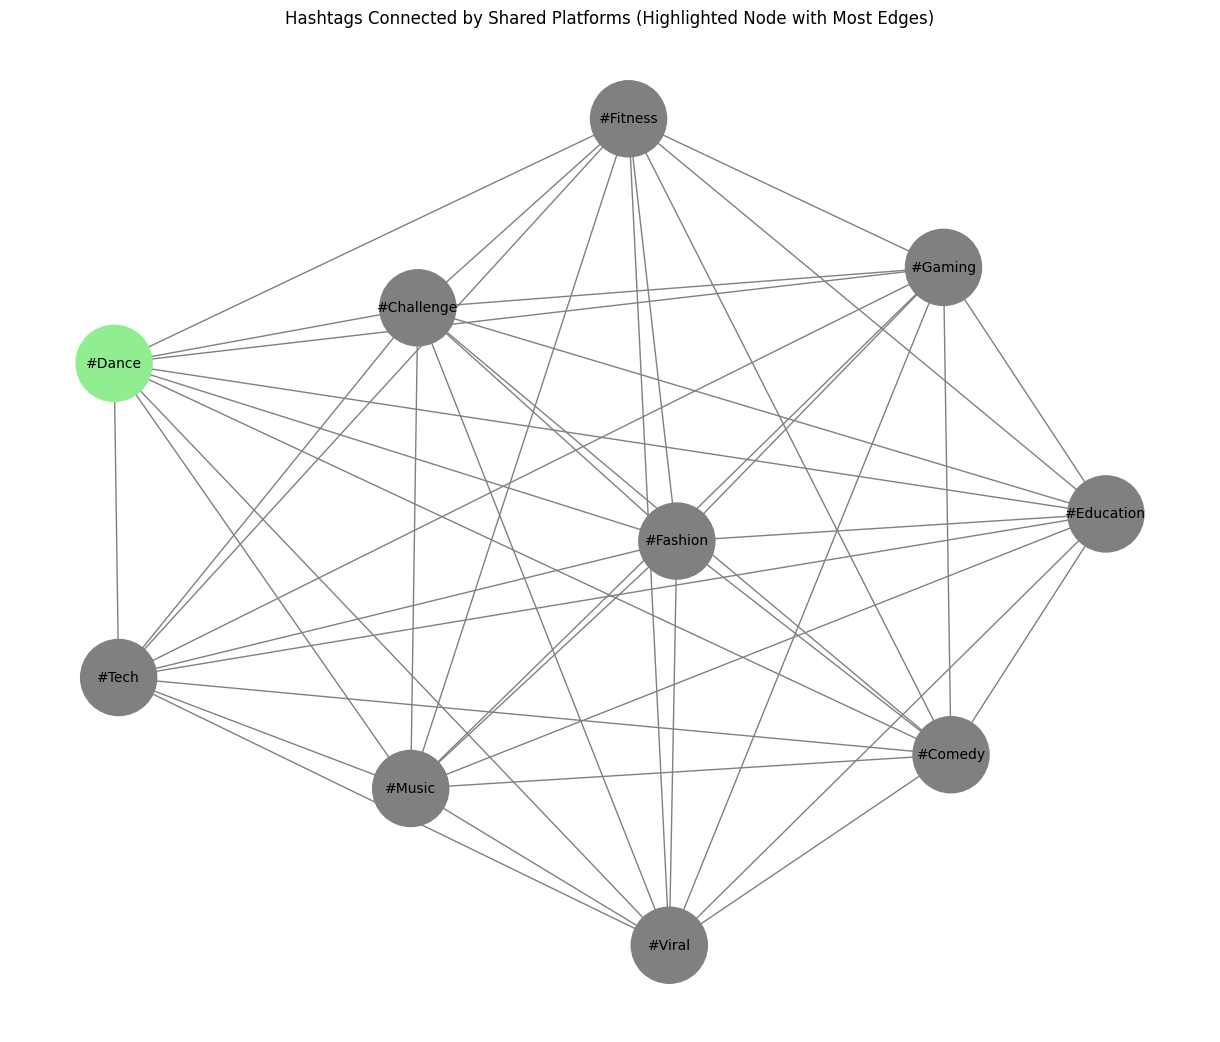

In [52]:
platform_groups = sorted_data.groupby('Platform')['Hashtag'].unique()

hashtags = sorted_data['Hashtag'].unique()
g.add_nodes_from(hashtags)

for hashtags_list in platform_groups:
    if len(hashtags_list) > 1:
        for i in range(len(hashtags_list)):
            for j in range(i + 1, len(hashtags_list)):
                u, v = hashtags_list[i], hashtags_list[j]
                if g.has_edge(u, v):
                    g[u][v]['weight'] += 1  
                else:
                    g.add_edge(u, v, weight=1)

degrees = dict(g.degree())
max_degree_node = max(degrees, key=degrees.get) 

node_colors = []
for node in g.nodes():
    if node == max_degree_node:
        node_colors.append('lightgreen') 
    else:
        node_colors.append('grey')

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(g, seed=42)
nx.draw(
    g,
    pos,
    with_labels=True,
    node_color=node_colors,
    edge_color='gray',
    node_size=3000,
    font_size=10
)
plt.title("Hashtags Connected by Shared Platforms (Highlighted Node with Most Edges)")
plt.show()